In [1]:
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.tools.jupyter import *
#from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import numpy as np

In [2]:
provider0 = IBMQ.load_account()
provider1 = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backends = provider0.backends()
backend = provider0.get_backend('ibmq_16_melbourne')

print("The backend is " + backend.name())

In [3]:
simulator = Aer.get_backend('qasm_simulator')
pi = np.pi

The backend is ibmq_16_melbourne


In [4]:
q = QuantumRegister(7)
c = ClassicalRegister(7)
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])


qc.x(q[6])


qc.cswap(q[2],q[3],q[5])
qc.cswap(q[2],q[4],q[6])

qc.cswap(q[1],q[3],q[5])
qc.cswap(q[1],q[4],q[6])


qc.cswap(q[1],q[3],q[5])
qc.cswap(q[1],q[4],q[6])


qc.cswap(q[0],q[3],q[5])
qc.cswap(q[0],q[4],q[6])
qc.cswap(q[0],q[3],q[5])
qc.cswap(q[0],q[4],q[6])
qc.cswap(q[0],q[3],q[5])
qc.cswap(q[0],q[4],q[6])
qc.cswap(q[0],q[3],q[5])
qc.cswap(q[0],q[4],q[6])

#qc.measure(q[0], c[0])
#qc.measure(q[1], c[1])
#qc.measure(q[2], c[2])

qc.h(q[0])

qc.cu1(pi/2,q[1] ,q[0])
qc.h(q[1])

qc.cu1(pi/4,q[2] ,q[0])
qc.cu1(pi/2,q[2] ,q[1])
qc.h(q[2])

#qc.cu1(pi/8,q[3] ,q[0])
#qc.cu1(pi/4,q[3] ,q[1])
#qc.cu1(pi/2,q[3] ,q[2])
#qc.h(q[3])

qc.swap(q[2] ,q[0])



qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

# IBMQ16

In [5]:
job_exp = execute(qc, backend=backend, shots=8192)
counts = job_exp.result().get_counts(qc)

Error checking job status using websocket, retrying using HTTP.


JobError: '525 Server Error: Origin SSL Handshake Error for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/5d39afe40706960019586c9d/status?access_token=...'

In [ ]:
print(counts)

In [ ]:
plot_histogram(counts)

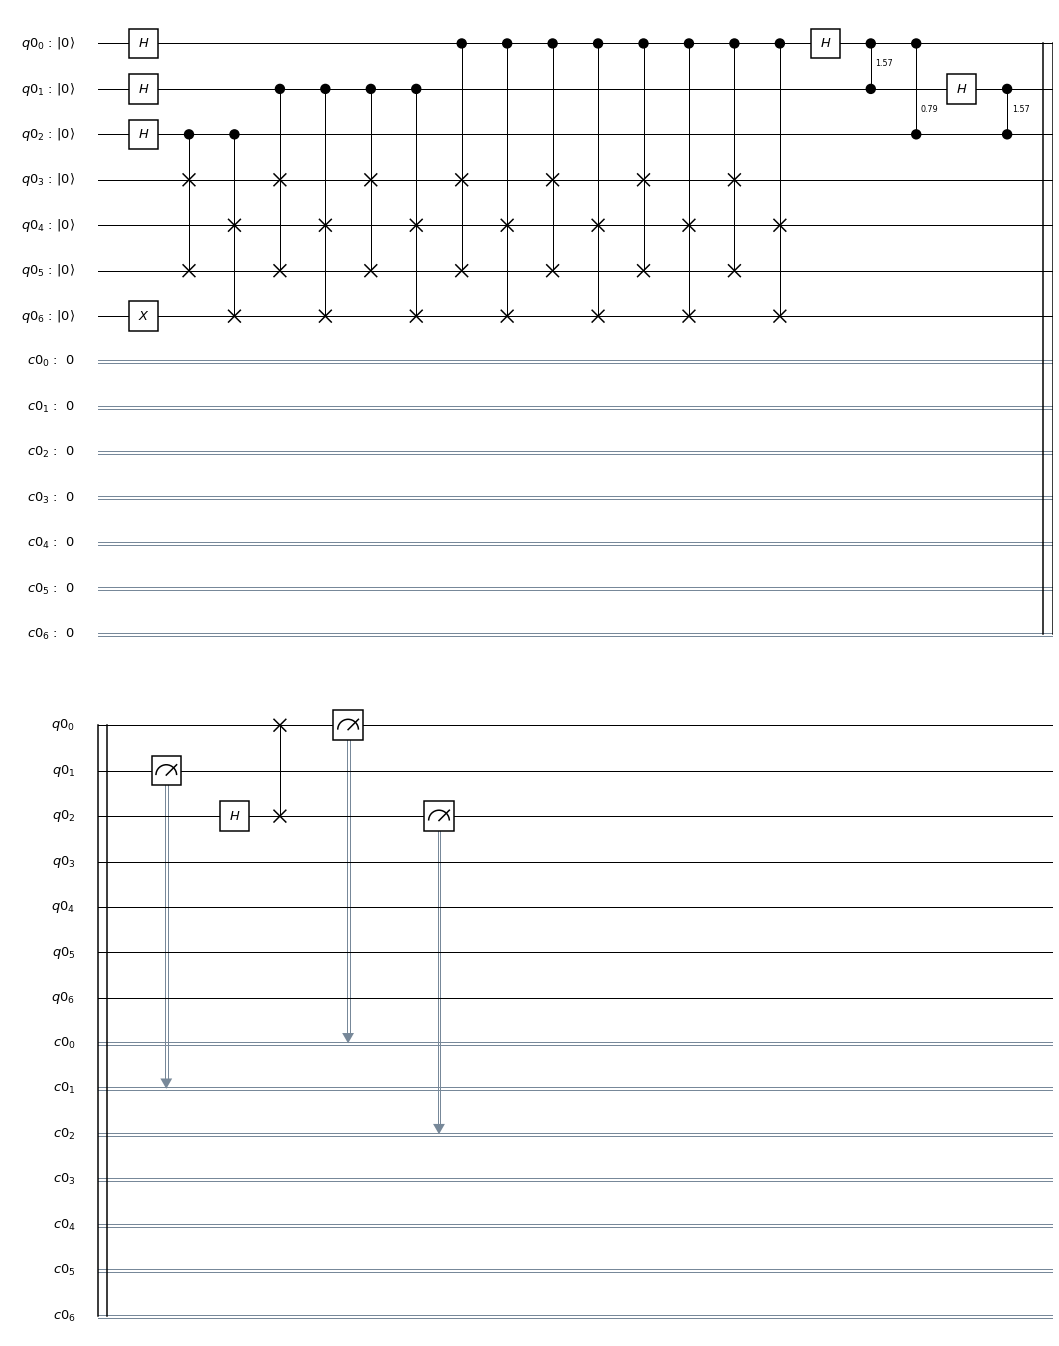

In [6]:
qc.draw(output='mpl')

# Simulator

In [10]:
job_sim = execute(qc, backend=simulator, shots=8192)
counts_sim = job_sim.result().get_counts(qc)

In [11]:
print("\nTotal count for simulator:",counts_sim)


Total count for simulator: {'0000000': 4083, '0000001': 4109}


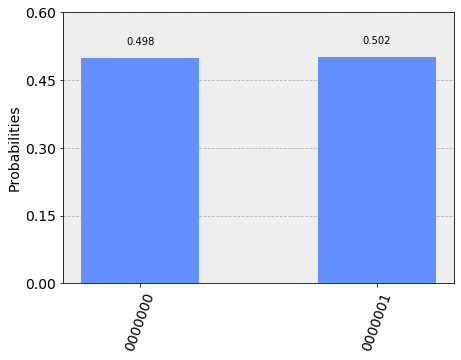

In [12]:
plot_histogram(counts_sim)

The periods found by the simulator are p= 0, which is ignored as a trivial period, and p= 4, which is a good one.Since M= 8, we can conclude thatrdivides M/p= 8/4 = 2, hence r= 2. 